In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("TimeSeriesData.csv")
data.head()

,Date,Type,Pos,Neg,Neu
0,01-Mar-21,Politics,314,311,375
1,01-Mar-21,Entertainment,693,64,243
2,01-Mar-21,Social,670,30,300
3,01-Mar-21,Song,106,82,812
4,01-Mar-21,Entertainment,420,76,504


In [3]:
data = data[data.Type=="Cricket"]
data.head()

,Date,Type,Pos,Neg,Neu
43,09-Mar-21,Cricket,726,6,268
44,09-Mar-21,Cricket,738,34,228
55,17-Mar-21,Cricket,68,24,908
58,17-Mar-21,Cricket,538,232,230
59,17-Mar-21,Cricket,327,41,632


In [4]:
data["Date"] = pd.to_datetime(data["Date"])

In [5]:
data = data[data.Date>"17-Mar-21"]
data.head()

,Date,Type,Pos,Neg,Neu
64,2021-03-18,Cricket,506,88,406
74,2021-03-20,Cricket,392,88,520
79,2021-03-21,Cricket,754,10,236
85,2021-03-23,Cricket,500,50,450
100,2021-03-26,Cricket,452,127,421


In [6]:
data.reset_index(inplace=True)

In [7]:
data.head()

,index,Date,Type,Pos,Neg,Neu
0,64,2021-03-18,Cricket,506,88,406
1,74,2021-03-20,Cricket,392,88,520
2,79,2021-03-21,Cricket,754,10,236
3,85,2021-03-23,Cricket,500,50,450
4,100,2021-03-26,Cricket,452,127,421


In [8]:
del data["index"]

In [9]:
data.head()

,Date,Type,Pos,Neg,Neu
0,2021-03-18,Cricket,506,88,406
1,2021-03-20,Cricket,392,88,520
2,2021-03-21,Cricket,754,10,236
3,2021-03-23,Cricket,500,50,450
4,2021-03-26,Cricket,452,127,421


In [10]:
data.to_csv(r'C:\Users\asus\Desktop\Hashtag WD\CricketData.csv',index=False)

In [2]:
data = pd.read_csv("CricketData.csv")
data.head()

,Date,Type,Pos,Neg,Neu
0,18-03-2021,Cricket,506,88,406
1,19-03-2021,Cricket,449,88,463
2,20-03-2021,Cricket,392,88,520
3,21-03-2021,Cricket,754,10,236
4,22-03-2021,Cricket,627,30,343


# Pos Time Series

In [4]:
data1 = data.iloc[:,[0,2]]

In [5]:
data1.set_index('Date',inplace=True)
data1.head()

,Pos
Date,
18-03-2021,506
19-03-2021,0
20-03-2021,392
21-03-2021,754
22-03-2021,0


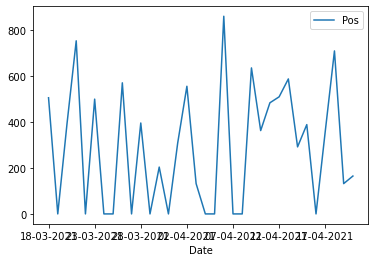

In [6]:
data1.plot();

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
# H0: It is non stationary
# H1: It is stationary
def adfuller_test(Pos):
    result = adfuller(Pos)
    labels = ["ADF Test statistics","P-value","#Lags Used","Number of Observation Used"]
    for value,labels in zip(result,labels):
        print(labels+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
    else:
        print("weak evidence against null hypothesis")

In [9]:
adfuller_test(data1["Pos"])

ADF Test statistics : -7.172924548393732
P-value : 2.774310473655622e-10
#Lags Used : 0
Number of Observation Used : 33
Strong evidence against null hypothesis


In [10]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
import statsmodels.api as sm

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


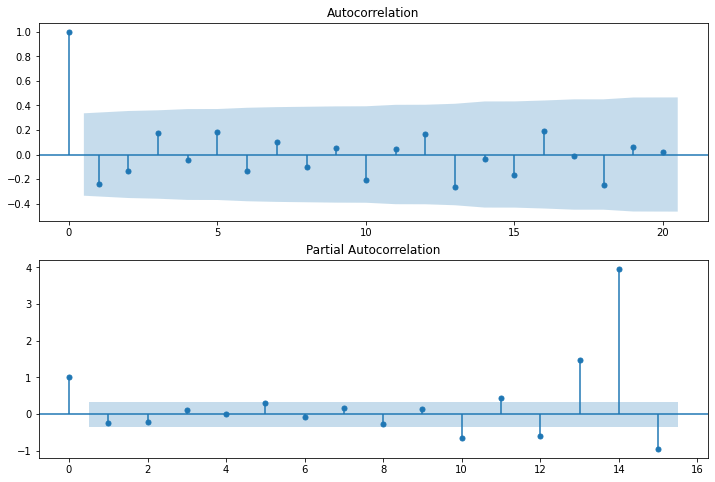

In [11]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data1['Pos'].iloc[0:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data1['Pos'].iloc[0:],lags=15,ax=ax2)

In [12]:
import pmdarima as pm

In [13]:
def arimamodel(df):
    automodel=pm.auto_arima(df,start_p=0,start_q=0,max_p=4,max_q=4,test="adf",seasonal=False,trace=True)
    return automodel

In [14]:
arimamodel(data1["Pos"])

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=496.339, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=486.987, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=494.359, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=478.090, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=477.342, Time=0.21 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=473.971, Time=0.04 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=475.693, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=471.977, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=475.349, Time=0.04 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=473.699, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=472.587, Time=0.30 sec

Best model:  ARIMA(4,1,0)(0,0,0)[0]          
Total fit time: 1.530 seconds


ARIMA(order=(4, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [15]:
from statsmodels.tsa.arima_model import ARIMA

In [16]:
model = ARIMA(data1['Pos'],order=(4,1,0))
model_fit1=model.fit()

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency i

In [17]:
model_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.Pos   No. Observations:                   33
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -231.090
Method:                       css-mle   S.D. of innovations            258.156
Date:                Sat, 01 May 2021   AIC                            474.180
Time:                        10:07:56   BIC                            483.160
Sample:                             1   HQIC                           477.202
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.0050     11.062     -0.091      0.928     -22.686      20.676
ar.L1.D.Pos    -1.0957      0.159     -6.899      0.000      -1.407      -0.784
ar.L2.D.Pos    -1.0803      0.219     -4.934      0.000      -1.510      -0.651
ar.L3.D.Pos    -0.6967      0.224     -3.107      0.002      -1.136      -0.257
ar.L4.D.Pos    -0.4107      0.167     -2.463      0.014      -0.738      -0.084
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.1259           -1.2466j            1.2530           -0.2340
AR.2            0.1259           +1.2466j            1.2530            0.2340
AR.3           -0.9741           -0.7760j            1.2454           -0.3929
AR.4           -0.9741           +0.7760j            1.2454            0.3929
-----------------------------------------------------------------------------
"""

<ipython-input-18-775a41f2f878>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['forecast']=model_fit1.predict(start=1,end=33, dynamic=False)


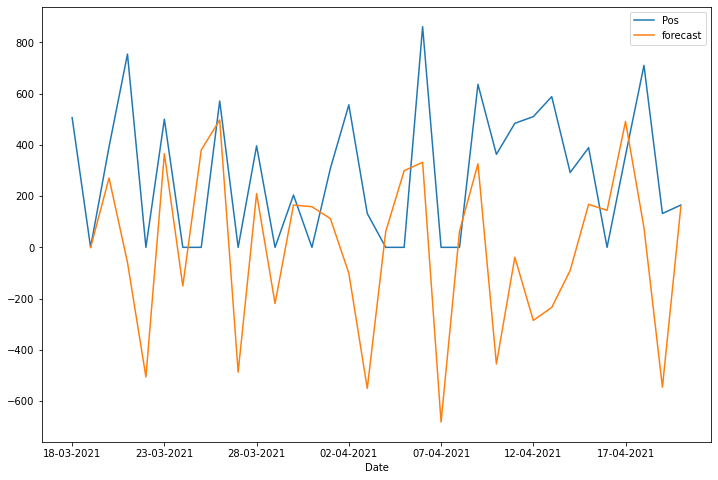

In [18]:
data1['forecast']=model_fit1.predict(start=1,end=33, dynamic=False)
#pd.Series(model_fit1.fittedvalues,copy=True)
data1[['Pos','forecast']].plot(figsize=(12,8));

In [19]:
Positive = model_fit1.forecast(steps=10)[0]

In [20]:
Positive

array([356.97828313, 365.2086339 , 358.87925946, 205.31137367,
       291.53411825, 359.68517523, 297.14781657, 290.73969215,
       278.12379846, 310.14620252])

# Neg Time Series

In [21]:
data2 = data.iloc[:,[0,3]]

In [22]:
data2.set_index('Date',inplace=True)
data2.head()

,Neg
Date,
18-03-2021,88
19-03-2021,0
20-03-2021,88
21-03-2021,10
22-03-2021,0


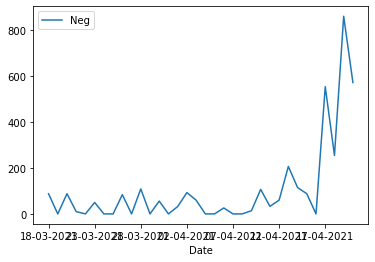

In [23]:
data2.plot();

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
# H0: It is non stationary
# H1: It is stationary
def adfuller_test(Neg):
    result = adfuller(Neg)
    labels = ["ADF Test statistics","P-value","#Lags Used","Number of Observation Used"]
    for value,labels in zip(result,labels):
        print(labels+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
    else:
        print("weak evidence against null hypothesis")

In [26]:
adfuller_test(data2["Neg"])

ADF Test statistics : 2.8362612369974447
P-value : 1.0
#Lags Used : 10
Number of Observation Used : 23
weak evidence against null hypothesis


In [27]:
data2['Neg_First_Difference'] = data2['Neg']-data2['Neg'].shift(1)
#data2['Neg'].shift(1)

<ipython-input-27-0fa6d72db0bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Neg_First_Difference'] = data2['Neg']-data2['Neg'].shift(1)


In [28]:
# Again test dickey fuller test
adfuller_test(data2['Neg_First_Difference'].dropna())

ADF Test statistics : 2.5857254811611696
P-value : 0.9990723782047033
#Lags Used : 10
Number of Observation Used : 22
weak evidence against null hypothesis


In [29]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
import statsmodels.api as sm

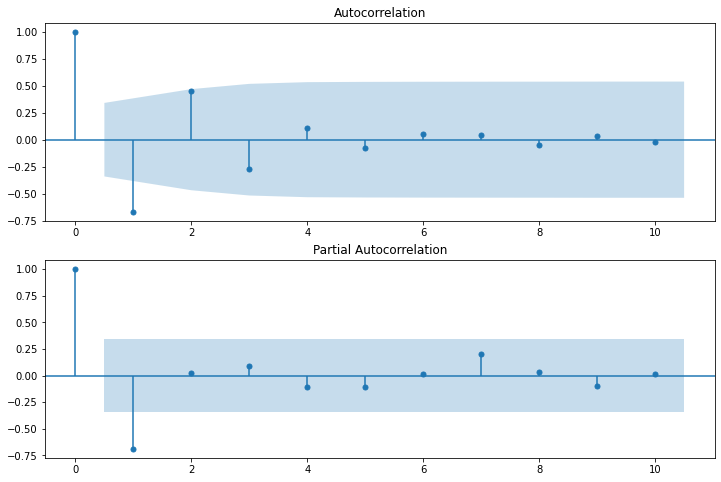

In [30]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data2['Neg_First_Difference'].dropna().iloc[0:],lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data2['Neg_First_Difference'].dropna().iloc[0:],lags=10,ax=ax2)

In [31]:
def arimamodel(df):
    automodel=pm.auto_arima(df,start_p=0,start_q=0,max_p=4,max_q=4,test="adf",seasonal=False,trace=True)
    return automodel

In [32]:
arimamodel(data2["Neg"])

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=462.798, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=414.872, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=460.811, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=411.789, Time=0.10 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=409.442, Time=0.28 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=408.354, Time=0.25 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=409.877, Time=0.42 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=408.882, Time=0.34 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=407.898, Time=0.17 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=408.209, Time=0.10 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=409.339, Time=0.29 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=408.539, Time=0.17 sec

Best model:  ARIMA(4,2,0)(0,0,0)[0]          
Total fit time: 2.330 seconds


ARIMA(order=(4, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [33]:
from statsmodels.tsa.arima_model import ARIMA

In [34]:
model = ARIMA(data2['Neg'],order=(4,2,0))
model_fit2=model.fit()

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency i

In [35]:
model_fit2.summary()

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D2.Neg   No. Observations:                   32
Model:                 ARIMA(4, 2, 0)   Log Likelihood                -205.143
Method:                       css-mle   S.D. of innovations            111.922
Date:                Sat, 01 May 2021   AIC                            422.286
Time:                        10:08:53   BIC                            431.080
Sample:                             2   HQIC                           425.201
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.7534        nan        nan        nan         nan         nan
ar.L1.D2.Neg    -1.6175    2.4e-05  -6.74e+04      0.000      -1.618      -1.617
ar.L2.D2.Neg    -1.1409   2.33e-05   -4.9e+04      0.000      -1.141      -1.141
ar.L3.D2.Neg    -0.8166   1.36e-05  -6.03e+04      0.000      -0.817      -0.817
ar.L4.D2.Neg    -0.2932   2.73e-06  -1.07e+05      0.000      -0.293      -0.293
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.0346           -1.4094j            1.4098           -0.2539
AR.2           -0.0346           +1.4094j            1.4098            0.2539
AR.3           -1.0000           -0.0000j            1.0000           -0.5000
AR.4           -1.7161           -0.0000j            1.7161           -0.5000
-----------------------------------------------------------------------------
"""

<ipython-input-36-de8c313b82e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['forecast']=model_fit2.predict(start=2,end=33, dynamic=False)


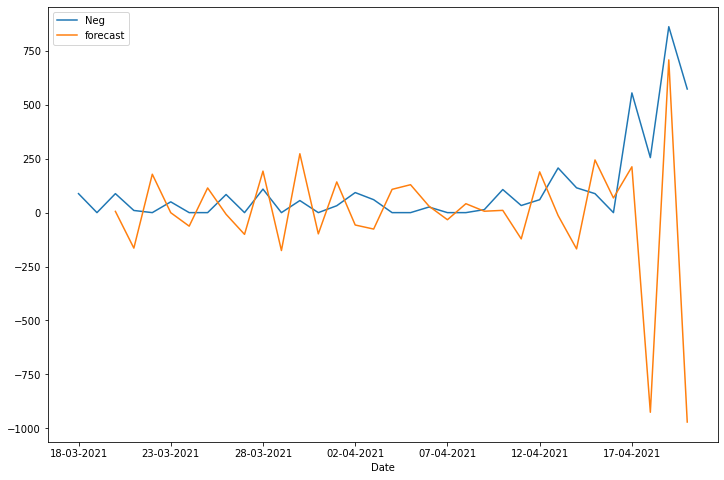

In [36]:
data2['forecast']=model_fit2.predict(start=2,end=33, dynamic=False)
#pd.Series(model_fit3.fittedvalues,copy=True)
data2[['Neg','forecast']].plot(figsize=(12,8));

In [37]:
Negative = model_fit2.forecast(steps=10)[0]

In [38]:
Negative

array([1236.15452354,  919.48350922, 1595.11836034, 1296.7685297 ,
       1990.67890472, 1695.80404657, 2400.64050468, 2119.85047861,
       2837.26048786, 2566.13952526])

# Neu Time Series

In [39]:
data3 = data.iloc[:,[0,4]]

In [40]:
data3.set_index('Date',inplace=True)
data3.head()

,Neu
Date,
18-03-2021,406
19-03-2021,0
20-03-2021,520
21-03-2021,236
22-03-2021,0


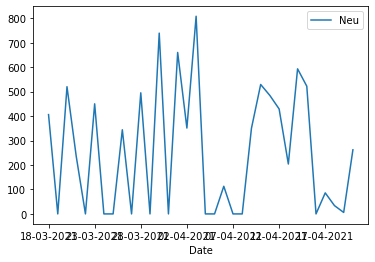

In [41]:
data3.plot();

In [42]:
from statsmodels.tsa.stattools import adfuller

In [43]:
# H0: It is non stationary
# H1: It is stationary
def adfuller_test(Neg):
    result = adfuller(Neg)
    labels = ["ADF Test statistics","P-value","#Lags Used","Number of Observation Used"]
    for value,labels in zip(result,labels):
        print(labels+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
    else:
        print("weak evidence against null hypothesis")

In [44]:
adfuller_test(data3["Neu"])

ADF Test statistics : -3.4097141425017634
P-value : 0.010632141226616595
#Lags Used : 5
Number of Observation Used : 28
Strong evidence against null hypothesis


In [45]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
import statsmodels.api as sm

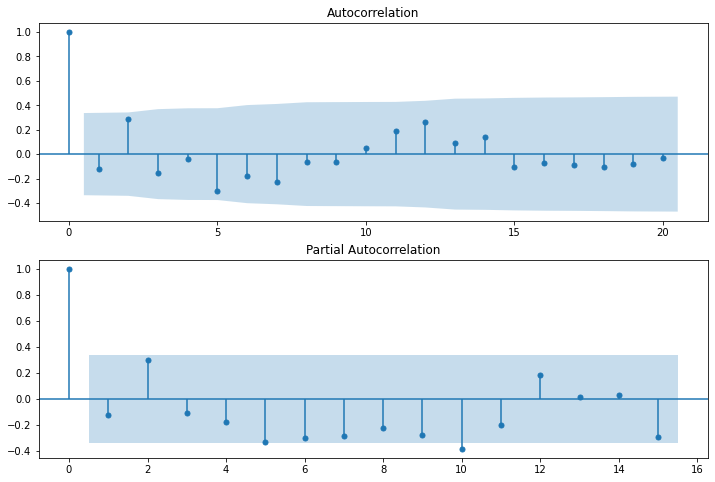

In [46]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data3['Neu'].iloc[0:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data3['Neu'].iloc[0:],lags=15,ax=ax2)

In [47]:
def arimamodel(df):
    automodel=pm.auto_arima(df,start_p=0,start_q=0,max_p=4,max_q=4,test="adf",seasonal=False,trace=True)
    return automodel

In [48]:
arimamodel(data3["Neu"])

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=515.251, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=482.189, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=513.279, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=476.078, Time=0.11 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=473.767, Time=0.22 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=474.062, Time=0.18 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=471.793, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=474.084, Time=0.03 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=472.065, Time=0.14 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA

ARIMA(order=(3, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [49]:
from statsmodels.tsa.arima_model import ARIMA

In [50]:
model = ARIMA(data3['Neu'],order=(3,2,0))
model_fit3=model.fit()

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency i

In [51]:
model_fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D2.Neu   No. Observations:                   32
Model:                 ARIMA(3, 2, 0)   Log Likelihood                -232.296
Method:                       css-mle   S.D. of innovations            333.212
Date:                Sat, 01 May 2021   AIC                            474.593
Time:                        10:10:10   BIC                            481.921
Sample:                             2   HQIC                           477.022
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.1946     16.760      0.131      0.896     -30.654      35.043
ar.L1.D2.Neu    -1.3752      0.162     -8.479      0.000      -1.693      -1.057
ar.L2.D2.Neu    -0.9170      0.248     -3.703      0.000      -1.402      -0.432
ar.L3.D2.Neu    -0.3623      0.165     -2.191      0.028      -0.686      -0.038
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2580           -0.0000j            1.2580           -0.5000
AR.2           -0.6367           -1.3375j            1.4813           -0.3207
AR.3           -0.6367           +1.3375j            1.4813            0.3207
-----------------------------------------------------------------------------
"""

<ipython-input-52-b7e8b7c1c61c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['forecast']=model_fit3.predict(start=2,end=33, dynamic=False)


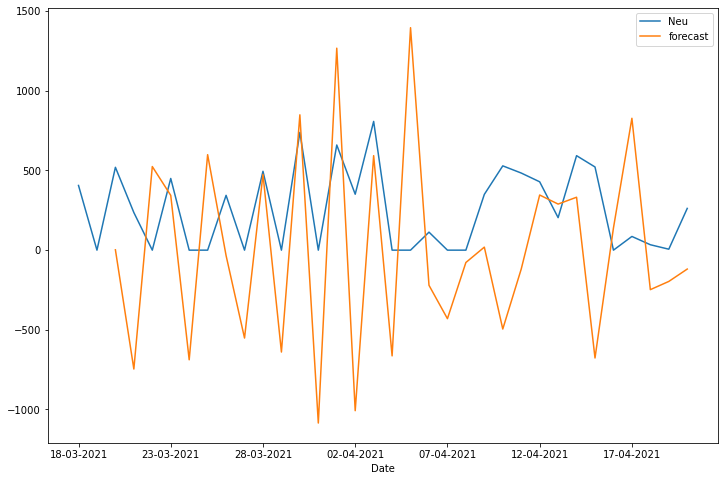

In [52]:
data3['forecast']=model_fit3.predict(start=2,end=33, dynamic=False)
#pd.Series(model_fit3.fittedvalues,copy=True)
data3[['Neu','forecast']].plot(figsize=(12,8));

In [53]:
Neutral = model_fit3.forecast(steps=10)[0]

In [54]:
Neutral

array([163.44410743, 291.36702935, 338.10722447, 425.26853858,
       457.26260792, 565.48641487, 612.84490712, 702.00686292,
       769.8998621 , 858.77710552])

In [55]:
E = list(zip(Positive,Negative,Neutral))

In [57]:
df = pd.DataFrame(E,columns=['Positive','Negative','Neutral'])

In [58]:
df

,Positive,Negative,Neutral
0,356.978283,1236.154524,163.444107
1,365.208634,919.483509,291.367029
2,358.879259,1595.118360,338.107224
3,205.311374,1296.768530,425.268539
4,291.534118,1990.678905,457.262608
5,359.685175,1695.804047,565.486415
6,297.147817,2400.640505,612.844907
7,290.739692,2119.850479,702.006863
8,278.123798,2837.260488,769.899862
9,310.146203,2566.139525,858.777106


In [61]:
df.to_csv(r'C:\Users\asus\Desktop\Hashtag WD\Cricket\Cricket_Pred.csv',index=False)

In [2]:
Sentiment = pd.read_csv("Cricket_Pred.csv")

In [3]:
Sentiment

,Positive,Negative,Neutral,Sentiment
0,356.978283,1236.154524,163.444107,Negative
1,365.208634,919.483509,291.367029,Negative
2,358.879260,1595.118360,338.107225,Negative
3,205.311374,1296.768530,425.268539,Negative
4,291.534118,1990.678905,457.262608,Negative
5,359.685175,1695.804047,565.486415,Negative
6,297.147817,2400.640505,612.844907,Negative
7,290.739692,2119.850479,702.006863,Negative
8,278.123798,2837.260488,769.899862,Negative
9,310.146203,2566.139525,858.777105,Negative


In [4]:
Actual_sentiment = pd.read_csv("Cricket_Actual_Sentiment.csv")

In [5]:
Actual_sentiment

,date,Pos,Neg,Neu,Sentiment
0,21-Apr-21,589,103,308,Positive
1,22-Apr-21,512,89,399,Positive
2,23-Apr-21,659,58,283,Positive
3,24-Apr-21,240,157,603,Neutral
4,25-Apr-21,702,198,100,Positive
5,26-Apr-21,489,212,299,Positive
6,27-Apr-21,270,207,523,Neutral
7,28-Apr-21,499,107,394,Positive
8,29-Apr-21,427,137,436,Neutral
9,30-Apr-21,324,278,398,Neutral


In [24]:
diff_Pos=abs(Sentiment.Positive-Actual_sentiment.Pos)
MAPE_Pos=np.mean(diff_Pos/Actual_sentiment.Pos)*100
print("MAPE for Positive :",MAPE_Pos)

diff_Neg=abs(Sentiment.Negative-Actual_sentiment.Neg)
MAPE_Neg=np.mean(diff_Neg/Actual_sentiment.Neg)*100
print("MAPE for Negative :",MAPE_Neg)

diff_Neu=abs(Sentiment.Neutral-Actual_sentiment.Neu)
MAPE_Neu=np.mean(diff_Neu/Actual_sentiment.Neu)*100
print("MAPE for Neutral :",MAPE_Neu)

MAPE for Positive : 30.390554357816736
MAPE for Negative : 1274.9713015997265
MAPE for Neutral : 85.695373592834


In [25]:
from sklearn.metrics import confusion_matrix

In [27]:
matrix=confusion_matrix(Actual_sentiment.Sentiment,Sentiment.Sentiment,labels=["Positive","Negative","Neutral"])
print("confusion matrix : \n",matrix)

confusion matrix : 
 [[0 6 0]
 [0 0 0]
 [0 4 0]]


In [28]:
matrix

array([[0, 6, 0],
       [0, 0, 0],
       [0, 4, 0]], dtype=int64)

In [35]:
dia_sum=np.trace(matrix)

In [36]:
all_sum=np.sum(matrix)

In [39]:
accuracy=dia_sum/all_sum
accuracy

0.0